In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # <-- Baris ini ditambahkan
import seaborn as sns  # <-- Baris ini ditambahkan
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df = pd.read_csv('data_teks.csv')
texts = df['data'].values
labels = df['labels'].values

# Mengubah label kategori (teks) menjadi angka (integer)
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)
# Mengubah integer menjadi format one-hot encoding untuk multi-class
one_hot_labels = tf.keras.utils.to_categorical(integer_labels)
num_classes = len(label_encoder.classes_)

## preprocessing teks

In [12]:
vocab_size = 10000  # Ukuran kosakata yang akan kita gunakan
oov_tok = "<OOV>"   # Token untuk kata yang tidak ada di vocabulary

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)

max_length = 200    # Panjang maksimum setiap sekuens/kalimat
padding_type = 'post'
trunc_type = 'post'
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

## ARSITEKTUR MODEL BiLSTM

In [14]:
embedding_dim = 128  # Dimensi vektor untuk setiap kata

model = Sequential([
    # Layer 1: Embedding
    # Layer ini akan mempelajari representasi vektor dari setiap kata dari data kita.
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, trainable=True),
    
    # Layer 2: Bidirectional LSTM
    # Memproses teks dari dua arah (depan ke belakang dan belakang ke depan) untuk pemahaman konteks yang lebih baik.
    Bidirectional(LSTM(64, return_sequences=True)),
    
    # Layer 3: Dropout
    # Mencegah overfitting dengan "mematikan" beberapa neuron secara acak saat training.
    Dropout(0.5),
    
    # Layer 4: LSTM kedua (bisa dihapus jika model terlalu kompleks)
    # Menangkap pola yang lebih kompleks dari output BiLSTM pertama.
    Bidirectional(LSTM(32)),

    # Layer 5: Dropout
    Dropout(0.5),
    
    # Layer 6: Dense Layer tersembunyi
    # Lapisan tersembunyi untuk membantu klasifikasi
    Dense(64, activation='relu'),

    # Layer 7: Output Layer
    # Menghasilkan probabilitas untuk setiap kelas kategori.
    Dense(num_classes, activation='softmax')
])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## pelatihan model

In [16]:
num_epochs = 20
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=2
)

print("\\nPelatihan selesai!")

Epoch 1/20
56/56 - 27s - 482ms/step - accuracy: 0.3253 - loss: 1.4887 - val_accuracy: 0.4921 - val_loss: 1.0973
Epoch 2/20
56/56 - 13s - 236ms/step - accuracy: 0.6112 - loss: 0.8167 - val_accuracy: 0.7326 - val_loss: 0.6158
Epoch 3/20
56/56 - 13s - 240ms/step - accuracy: 0.7826 - loss: 0.5086 - val_accuracy: 0.7978 - val_loss: 0.5833
Epoch 4/20
56/56 - 13s - 233ms/step - accuracy: 0.9208 - loss: 0.2723 - val_accuracy: 0.8360 - val_loss: 0.5823
Epoch 5/20
56/56 - 13s - 227ms/step - accuracy: 0.9702 - loss: 0.1477 - val_accuracy: 0.8921 - val_loss: 0.4392
Epoch 6/20
56/56 - 13s - 231ms/step - accuracy: 0.9860 - loss: 0.0709 - val_accuracy: 0.8787 - val_loss: 0.4943
Epoch 7/20
56/56 - 14s - 242ms/step - accuracy: 0.9955 - loss: 0.0356 - val_accuracy: 0.9056 - val_loss: 0.4324
Epoch 8/20
56/56 - 14s - 252ms/step - accuracy: 0.9983 - loss: 0.0181 - val_accuracy: 0.9056 - val_loss: 0.4765
Epoch 9/20
56/56 - 13s - 230ms/step - accuracy: 0.9994 - loss: 0.0130 - val_accuracy: 0.9101 - val_loss:

## visualisasi akurasi dan loss


Grafik learning curves telah disimpan sebagai 'learning_curves.png'


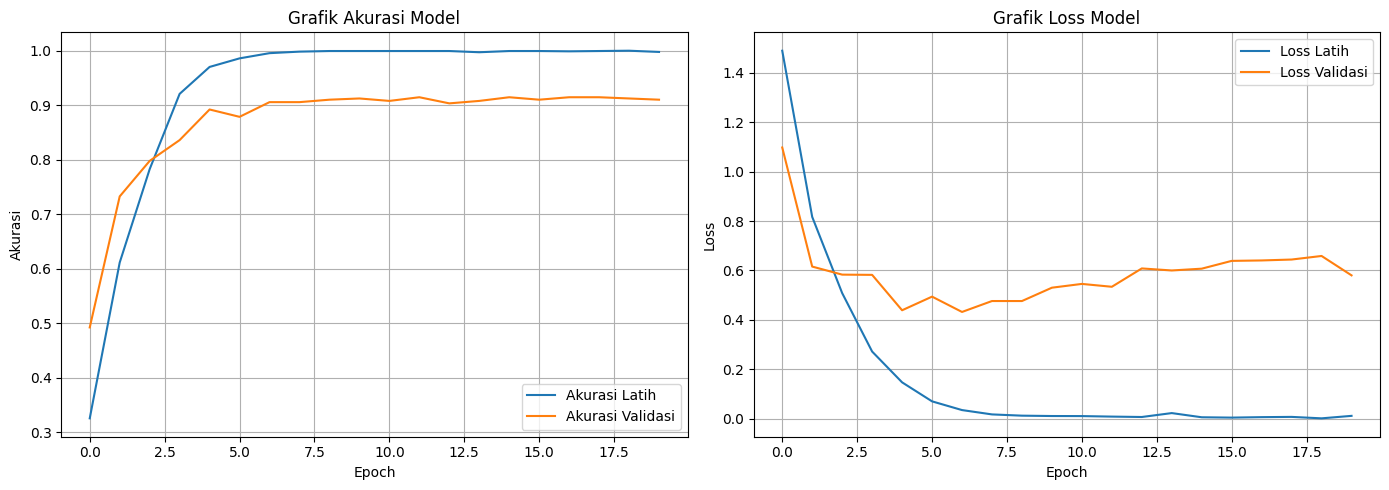

In [17]:
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('learning_curves.png')
print("\nGrafik learning curves telah disimpan sebagai 'learning_curves.png'")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step
Confusion matrix telah disimpan sebagai 'confusion_matrix.png'


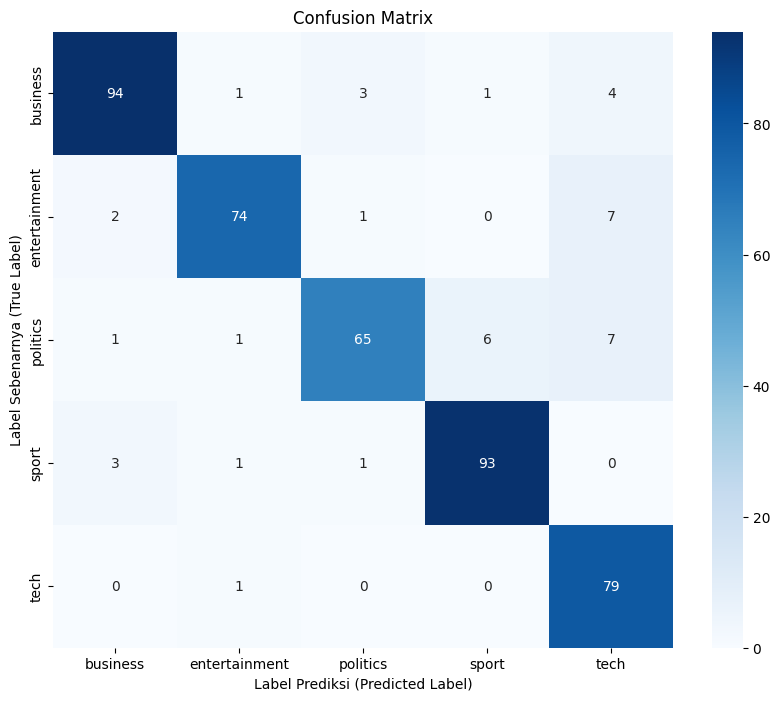

In [18]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = label_encoder.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya (True Label)')
plt.xlabel('Label Prediksi (Predicted Label)')
plt.savefig('confusion_matrix.png')
print("Confusion matrix telah disimpan sebagai 'confusion_matrix.png'")


In [ ]:
new_text = ["Indonesia's central bank kept its benchmark interest rate unchanged on Thursday, as expected, saying the current level is consistent with efforts to stabilize the rupiah currency and control inflation."]

# Pra-pemrosesan teks baru
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Melakukan prediksi
prediction = model.predict(new_padded)
predicted_class_index = np.argmax(prediction)
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

print("\n--- Prediksi Teks Baru ---")
print(f"Teks: '{new_text[0]}'")
print(f"Prediksi Kategori: {predicted_class_name}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi Rinci:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

--- Prediksi Teks Baru ---
Teks: 'Malaysian mixed doubles pair Chen Tang Jie and Toh Ee Wei won the 2025 BWF World Championships. This success also highlighted the role of Indonesian coach Nova Widianto, who was credited with boosting their performance. Meanwhile, Indonesia's Putri KW took home a bronze medal and is now targeting a top spot for the 2028 Olympics.'
Prediksi Kategori: business

Laporan Klasifikasi Rinci:
               precision    recall  f1-score   support

     business       0.94      0.91      0.93       103
entertainment       0.95      0.88      0.91        84
     politics       0.93      0.81      0.87        80
        sport       0.93      0.95      0.94        98
         tech       0.81      0.99      0.89        80

     accuracy                           0.91       445
    macro avg       0.91      0.91      0.91       445
 weighted avg       0.91      0.91      0.91       445

